In [1]:
from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)

from pyomo.network import Arc, SequentialDecomposition

from idaes.core.util.initialization import propagate_state

# Import plotting functions
import matplotlib.pyplot as plt

# Import numpy library 
import numpy as np

import pandas as pd

# Import the main FlowsheetBlock from IDAES. The flowsheet block will contain the unit model
from idaes.core import FlowsheetBlock

import idaes.logger as idaeslog
from pyomo.opt import TerminationCondition, SolverStatus

# Import the degrees_of_freedom function from the idaes.core.util.model_statistics package
# DOF = Number of Model Variables - Number of Model Constraints
from idaes.core.util.model_statistics import degrees_of_freedom

# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)

# Import unit models from the model library
from idaes.generic_models.unit_models import Flash

In [2]:
from R125_R32_PR3 import configuration
data = pd.read_csv('R32R125.csv')

solver = SolverFactory('ipopt')
# solver.options = {'tol': 1e-6}

In [3]:
# m = ConcreteModel()

# m.fs = FlowsheetBlock(default={"dynamic": False})

# m.fs.properties = GenericParameterBlock(default=configuration)

# m.fs.F101 = Flash(default={"property_package": m.fs.properties,
#                            "has_heat_transfer": True,
#                            "has_pressure_change": False})

# m.fs.properties.PR_kappa['R32', 'R125'].fix(1.1277)
# m.fs.properties.PR_kappa['R125', 'R32'].fix(1.1277)

# m.fs.F101.inlet.flow_mol.fix(1)
# m.fs.F101.inlet.temperature.fix(298.15)
# m.fs.F101.inlet.pressure.fix(1059200)
# # m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.5)
# # m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(0.5)

# m.fs.F101.liq_outlet.temperature.fix(298.15)

# # DOF_final = degrees_of_freedom(m)
# # print("The final DOF is {0}".format(DOF_final))

# # # Initialize the flash unit
# # m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# # status = solver.solve(m, tee = True)

# # Fix the state variables on the state block
# # m.fs.F101.inlet.pressure.unfix()
# m.fs.F101.inlet.mole_frac_comp[0,'R32'].unfix()
# m.fs.F101.inlet.mole_frac_comp[0,'R125'].unfix()

# # T = [265.15,275.15,283.15,293.15,303.15]
# # T = 283.15
# # x = np.linspace(0.001, 0.2, 10)

# # R32_x = np.zeros((len(x)))
# # R32_y = np.zeros((len(x)))
# # P = np.zeros((len(x)))
# m.fs.liq = Param(mutable=True,default=0.5021)
# m.fs.vap = Param(mutable=True,default=0.5556)
# m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "R32"] == m.fs.liq)
# m.fs.liquid2 = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "R125"] == 1-m.fs.liq)
# # m.fs.vapor = Constraint(expr=m.fs.F101.vap_outlet.mole_frac_comp[0, "R32"] == m.fs.vap)
# # m.fs.vapor2 = Constraint(expr=m.fs.F101.vap_outlet.mole_frac_comp[0, "R125"] == 1-m.fs.vap)

# DOF_final = degrees_of_freedom(m)
# print("The final DOF is {0}".format(DOF_final))

# m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# status = solver.solve(m, tee = True)


# # for j in range(len(T)):
    
# for i in range(len(x)):
# #     m.fs.liq = data["x_R125"].iloc[i]
# #     m.fs.vap = data["y_R125"].iloc[i]
#     m.fs.F101.inlet.temperature.fix(T)
# #     m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(0.7936)
#     m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(1-x[i])
#     m.fs.F101.vap_outlet.pressure.fix(1106600)
# #     m.fs.F101.inlet.pressure.unfix()
# #     m.fs.F101.inlet.pressure.fix(float(data["pressure"].iloc[i]))
# #     m.fs.F101.liq_outlet.mole_frac_comp[0,'R32'].fix(float(0.7936)
# #     m.fs.F101.liq_outlet.mole_frac_comp[0,'R125'].fix(float(1-(data["x_R32"].iloc[i])))
# #     m.fs.F101.vap_outlet.temperature.fix(float(data["temperature"].iloc[i]))
# #     m.fs.F101.vap_outlet.mole_frac_comp[0,'R32'].fix(float(data["y_R32"].iloc[i]))

#     DOF_final = degrees_of_freedom(m)
#     print("The final DOF is {0}".format(DOF_final))

#     m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

#     status = solver.solve(m, tee = False)

# #     m.fs.F101.report()
#     if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):

#         R32_x[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32']) 
#         R32_y[i] = value(m.fs.F101.vap_outlet.mole_frac_comp[0,'R32']) 
#         P[i] = value(m.fs.F101.vap_outlet.pressure[0])

#     else:
#         print('Infeasible.')

In [4]:
# m.fs.F101.report()
# print(R32_x)
# print(R32_y)
# print(P)

In [5]:
m = ConcreteModel()

m.fs = FlowsheetBlock(default={"dynamic": False})

m.fs.properties = GenericParameterBlock(default=configuration)

m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": False})

m.fs.F101.inlet.flow_mol.fix(1)
m.fs.F101.inlet.temperature.fix(323.15)
m.fs.F101.inlet.pressure.fix(399800)
# m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.5)

m.fs.properties.PR_kappa['R32', 'R125'].fix(0.0041)
m.fs.properties.PR_kappa['R125', 'R32'].fix(0.0041)

# Initialize the flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# Fix the state variables on the state block
# m.fs.F101.inlet.pressure.unfix()
# m.fs.F101.inlet.mole_frac_comp[0,'bmimPF6'].unfix()

R32_x = np.zeros((len(data)))
R32_y = np.zeros((len(data)))
P = np.zeros((len(data)))

# m.fs.liq = Param(mutable=True,default=0.040)
# m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "R32"] == m.fs.liq)

for i in range(len(data)):
#     m.fs.liq = data["x_R32"].iloc[i]
    m.fs.F101.inlet.temperature.fix(float(data["temperature"].iloc[i]))
    m.fs.F101.inlet.pressure.fix(float(data["pressure"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(data["x_R32"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(float(data["x_R125"].iloc[i]))
    m.fs.F101.vap_outlet.temperature.fix(float(data["temperature"].iloc[i]))
    
    DOF_final = degrees_of_freedom(m)
    print("The final DOF is {0}".format(DOF_final))
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    
    status = solver.solve(m, tee = False)

#     m.fs.F101.report()
    if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):

        R32_x[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32']) 
        R32_y[i] = value(m.fs.F101.vap_outlet.mole_frac_comp[0,'R32']) 
        P[i] = value(m.fs.F101.vap_outlet.pressure[0])
        print('feasible')

    else:
        print('Infeasible.')

# m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.5)

m.fs.properties.PR_kappa['R32', 'R125'].fix(0.0)
m.fs.properties.PR_kappa['R125', 'R32'].fix(0.0)

# Initialize the flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# Fix the state variables on the state block
# m.fs.F101.inlet.pressure.unfix()
# m.fs.F101.inlet.mole_frac_comp[0,'bmimPF6'].unfix()

R32_x2 = np.zeros((len(data)))
P2 = np.zeros((len(data)))
R32_y2 = np.zeros((len(data)))

# m.fs.liq = Param(mutable=True,default=0.040)
# m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "R32"] == m.fs.liq)

for i in range(len(data)):
#     m.fs.liq = data["x_R32"].iloc[i]
    m.fs.F101.inlet.temperature.fix(float(data["temperature"].iloc[i]))
    m.fs.F101.inlet.pressure.fix(float(data["pressure"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(data["x_R32"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(float(data["x_R125"].iloc[i]))
    m.fs.F101.vap_outlet.temperature.fix(float(data["temperature"].iloc[i]))
    
    DOF_final = degrees_of_freedom(m)
    print("The final DOF is {0}".format(DOF_final))
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    
    status = solver.solve(m, tee = False)

#     m.fs.F101.report()
    if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):

        R32_x2[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32']) 
        R32_y2[i] = value(m.fs.F101.vap_outlet.mole_frac_comp[0,'R32']) 
        P2[i] = value(m.fs.F101.vap_outlet.pressure[0])
        print('feasible')

    else:
        print('Infeasible.')
        
# m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.5)

m.fs.properties.PR_kappa['R32', 'R125'].fix(-0.03125)
m.fs.properties.PR_kappa['R125', 'R32'].fix(-0.03125)

# Initialize the flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# Fix the state variables on the state block
# m.fs.F101.inlet.pressure.unfix()
# m.fs.F101.inlet.mole_frac_comp[0,'bmimPF6'].unfix()

R32_x3 = np.zeros((len(data)))
P2 = np.zeros((len(data)))
R32_y3 = np.zeros((len(data)))

# m.fs.liq = Param(mutable=True,default=0.040)
# m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "R32"] == m.fs.liq)

for i in range(len(data)):
#     m.fs.liq = data["x_R32"].iloc[i]
    m.fs.F101.inlet.temperature.fix(float(data["temperature"].iloc[i]))
    m.fs.F101.inlet.pressure.fix(float(data["pressure"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(data["x_R32"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(float(data["x_R125"].iloc[i]))
    m.fs.F101.vap_outlet.temperature.fix(float(data["temperature"].iloc[i]))
    
    DOF_final = degrees_of_freedom(m)
    print("The final DOF is {0}".format(DOF_final))
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    
    status = solver.solve(m, tee = False)

#     m.fs.F101.report()
    if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):

        R32_x3[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32']) 
        R32_y3[i] = value(m.fs.F101.vap_outlet.mole_frac_comp[0,'R32']) 
        P2[i] = value(m.fs.F101.vap_outlet.pressure[0])
        print('feasible')

    else:
        print('Infeasible.')

The final DOF is 0
    model.name="fs.F101";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
Infeasible.
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasib

feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
Infeasible.
    model.name="fs.F101";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
The final DOF is 0
    model.name="SimpleBlock";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
    model.name="SimpleBlock";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasibl

    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
Infeasible.
The final DOF is 0
    model.name="fs.F101";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
Infeasible.
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
    model.name="fs.F101";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\

In [6]:
print(R32_x)

[0.00000000e+00 9.36890488e-02 1.70781439e-01 2.22099483e-01
 2.27065020e-01 2.52293164e-01 3.83138458e-01 4.93210452e-01
 5.93704615e-01 6.57895209e-01 7.57081056e-01 8.92848331e-01
 9.11739335e-01 9.99081626e-01 9.94970513e-04 7.22756890e-02
 1.01353082e-01 2.27684087e-01 1.72198239e-01 3.12483200e-01
 4.22253795e-01 4.82506268e-01 6.07941128e-01 7.57016911e-01
 8.31572080e-01 8.60951285e-01 9.27362108e-01 9.99057432e-01
 9.94370690e-04 7.33554026e-02 1.55111543e-01 2.05540138e-01
 2.84630991e-01 3.03203594e-01 3.46720430e-01 4.61421133e-01
 5.86796611e-01 6.08000386e-01 6.94447394e-01 7.78171530e-01
 8.47718634e-01 9.08726201e-01 9.99040174e-01 9.93140190e-04
 1.73595579e-01 2.94763233e-01 3.17831570e-01 3.80373389e-01
 4.17991057e-01 5.17033790e-01 5.67313769e-01 6.37807812e-01
 7.09568302e-01 7.81837867e-01 0.00000000e+00 0.00000000e+00
 1.63995849e-01 2.81369866e-01 3.71083304e-01 4.40363440e-01
 5.12740424e-01 5.86326896e-01 6.41848462e-01 7.16985097e-01
 7.75247368e-01 9.990066

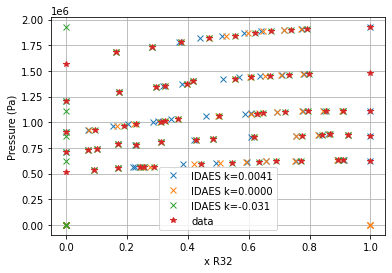

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(R32_x,P,"x",label="IDAES k=0.0041")  
plt.plot(R32_x2,P2,"x",label="IDAES k=0.0000")  
plt.plot(R32_x3,P,"x",label="IDAES k=-0.031")  
plt.plot(data["x_R32"],data["pressure"],"*",label="data")  

plt.ylabel('Pressure (Pa)')
plt.xlabel('x R32')
plt.grid(True)
# ax.set_xlim([0.5, 1])
# ax.set_ylim([1.05e6, 1.15e6])
plt.legend()
plt.show()

In [8]:
print(P)

[      0.  537300.  553300.  561800.  562800.  567800.  591400.  603900.
  613400.  619600.  624800.  628100.  628600.  624100.  714300.  732800.
  740400.  776800.  788600.  802600.  824600.  837500.  859100.  867100.
  872500.  881100.  878900.  866500.  908800.  926800.  962100.  980200.
 1007000. 1013000. 1026600. 1059200. 1083800. 1089200. 1096500. 1106600.
 1109400. 1112300. 1107000. 1205000. 1299100. 1340800. 1348400. 1373600.
 1398600. 1422600. 1437300. 1450300. 1460700. 1470400.       0.       0.
 1683500. 1736600. 1781700. 1816000. 1839400. 1869600. 1887000. 1893400.
 1905900. 1925000.]


In [9]:
m = ConcreteModel()

m.fs = FlowsheetBlock(default={"dynamic": False})

m.fs.properties = GenericParameterBlock(default=configuration)

m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": False})

m.fs.F101.inlet.flow_mol.fix(1)
m.fs.F101.inlet.temperature.fix(303.15)
m.fs.F101.inlet.pressure.fix(1567000)
x = 0.0001
m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(x)
m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(1-x)

m.fs.properties.PR_kappa['R32', 'R125'].fix(0.0041)
m.fs.properties.PR_kappa['R125', 'R32'].fix(0.0041)

m.fs.F101.vap_outlet.temperature.fix(303.15)

DOF_final = degrees_of_freedom(m)
print("The final DOF is {0}".format(DOF_final))

# Initialize the flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

status = solver.solve(m, tee = True)

2021-03-11 23:38:52 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-11 23:38:52 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-11 23:38:52 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-11 23:38:52 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R125 was not assigned a type. Using generic Component object.
The final DOF is 0
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information v

In [10]:
m.fs.F101.report()


Unit : fs.F101                                                             Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key       : Value      : Fixed : Bounds
    Heat Duty : 2.3774e-05 : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                           Inlet    Vapor Outlet  Liquid Outlet
    flow_mol                1.0000     0.023198       0.97680  
    mole_frac_comp R32  0.00010000   0.00012628    9.9376e-05  
    mole_frac_comp R125    0.99990      0.99987       0.99990  
    temperature             303.15       303.15        303.15  
    pressure            1.5670e+06   1.5670e+06    1.5670e+06  


In [11]:
# m.display()

In [12]:
# from idaes.core.util.model_statistics import large_residuals_set

In [13]:
# print(large_residuals_set(m.fs.F101))

In [14]:
m = ConcreteModel()

m.fs = FlowsheetBlock(default={"dynamic": False})

m.fs.properties = GenericParameterBlock(default=configuration)

m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": False})

m.fs.F101.inlet.flow_mol.fix(1)
m.fs.F101.inlet.temperature.fix(303.15)
m.fs.F101.inlet.pressure.fix(1567000)
x = 0.0001
m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(x)
m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(1-x)

m.fs.properties.PR_kappa['R32', 'R125'].fix(0.0041)
m.fs.properties.PR_kappa['R125', 'R32'].fix(0.0041)

m.fs.F101.vap_outlet.temperature.fix(303.15)

DOF_final = degrees_of_freedom(m)
print("The final DOF is {0}".format(DOF_final))

# Initialize the flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

status = solver.solve(m, tee = True)

2021-03-11 23:38:59 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-11 23:38:59 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-11 23:38:59 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-11 23:38:59 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R125 was not assigned a type. Using generic Component object.
The final DOF is 0
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information v

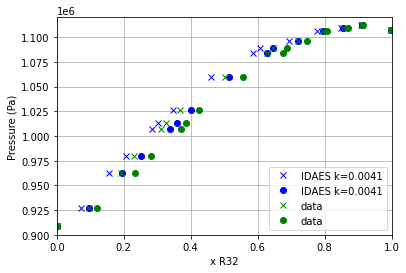

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(R32_x,P,"bx",label="IDAES k=0.0041")  
plt.plot(R32_y,P,"bo",label="IDAES k=0.0041")  
# plt.plot(R32_x2,P2,"rx",label="IDAES k=0.0000") 
# plt.plot(R32_y2,P2,"ro",label="IDAES k=0.0000")  
# plt.plot(R32_x3,P2,"cx",label="IDAES k=-0.03125") 
# plt.plot(R32_y3,P2,"co",label="IDAES k=-0.03125")  
plt.plot(data["x_R32"],data["pressure"],"gx",label="data")  
plt.plot(data["y_R32"],data["pressure"],"go",label="data") 
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R32')
plt.grid(True)
ax.set_xlim([0.0, 1])
ax.set_ylim([0.9e6, 1.120e6])
plt.legend()
plt.show()

In [16]:
m = ConcreteModel()

m.fs = FlowsheetBlock(default={"dynamic": False})

m.fs.properties = GenericParameterBlock(default=configuration)

m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": False})

m.fs.F101.inlet.flow_mol.fix(1)
m.fs.F101.inlet.temperature.fix(283.15)
m.fs.F101.inlet.pressure.fix(1107000)
x = 0.9999
m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(x)
m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(1-x)

m.fs.properties.PR_kappa['R32', 'R125'].fix(0.0041)
m.fs.properties.PR_kappa['R125', 'R32'].fix(0.0041)

m.fs.F101.vap_outlet.temperature.fix(283.15)

DOF_final = degrees_of_freedom(m)
print("The final DOF is {0}".format(DOF_final))

# Initialize the flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

status = solver.solve(m, tee = True)

2021-03-11 23:39:05 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-11 23:39:05 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-11 23:39:05 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-11 23:39:05 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R125 was not assigned a type. Using generic Component object.
The final DOF is 0
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information v

In [17]:
m.fs.F101.report()


Unit : fs.F101                                                             Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key       : Value       : Fixed : Bounds
    Heat Duty : -0.00030911 : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                           Inlet    Vapor Outlet  Liquid Outlet
    flow_mol                1.0000      0.93672      0.063284  
    mole_frac_comp R32     0.99990      0.99990       0.99990  
    mole_frac_comp R125 0.00010000   0.00010026    9.6146e-05  
    temperature             283.15       283.15        283.15  
    pressure            1.1070e+06   1.1070e+06    1.1070e+06  


In [18]:
solver.options = {'tol': 1e-6}

m = ConcreteModel()

m.fs = FlowsheetBlock(default={"dynamic": False})

m.fs.properties = GenericParameterBlock(default=configuration)

m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": False})

m.fs.F101.inlet.flow_mol.fix(1)
m.fs.F101.inlet.temperature.fix(303.15)
m.fs.F101.inlet.pressure.fix(1925000)
x = 0.9999
m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(x)
m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(1-x)

m.fs.properties.PR_kappa['R32', 'R125'].fix(0.04124)
m.fs.properties.PR_kappa['R125', 'R32'].fix(-0.02749)

m.fs.F101.vap_outlet.temperature.fix(303.15)

DOF_final = degrees_of_freedom(m)
print("The final DOF is {0}".format(DOF_final))

# Initialize the flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

status = solver.solve(m, tee = True)

2021-03-11 23:39:12 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-11 23:39:12 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-11 23:39:12 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-11 23:39:12 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R125 was not assigned a type. Using generic Component object.
The final DOF is 0
Ipopt 3.13.2: tol=1e-06


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more inf

  64r 0.0000000e+00 1.11e+00 1.00e+03  -2.5 0.00e+00    -  0.00e+00 0.00e+00R  1
  65r 0.0000000e+00 1.00e-01 2.13e+01  -2.5 5.03e-06    -  9.79e-01 1.00e+00f  1
  66r 0.0000000e+00 9.74e-02 5.07e+02  -2.5 1.37e-04    -  5.92e-02 1.00e+00f  1
  67r 0.0000000e+00 9.74e-02 2.07e+01  -2.5 1.47e-04    -  6.53e-01 1.00e+00f  1
  68r 0.0000000e+00 9.74e-02 9.53e+00  -2.5 4.11e-04    -  5.82e-01 1.00e+00f  1
  69r 0.0000000e+00 9.74e-02 3.93e+00  -2.5 9.81e-04    -  5.86e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70r 0.0000000e+00 9.73e-02 1.63e+00  -2.5 2.36e-03    -  5.87e-01 1.00e+00f  1
  71r 0.0000000e+00 9.54e-02 6.70e-01  -2.5 5.68e-03    -  5.89e-01 1.00e+00f  1
  72r 0.0000000e+00 7.07e-02 9.63e-01  -2.5 1.35e-02    -  5.95e-01 1.00e+00f  1
  73r 0.0000000e+00 2.03e-01 2.02e+00  -2.5 3.04e-02    -  6.23e-01 1.00e+00f  1
  74r 0.0000000e+00 1.63e+00 2.29e+00  -2.5 5.40e-02    -  7.63e-01 1.00e+00f  1
  75r 0.0000000e+00 7.47e-01

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 160r 0.0000000e+00 1.44e-02 2.21e+01  -3.8 6.32e-02    -  9.79e-01 8.55e-01f  1
 161  0.0000000e+00 1.57e+00 2.90e+04  -2.5 2.67e-01    -  9.02e-01 9.59e-01h  1
 162  0.0000000e+00 1.38e+00 2.58e+04  -2.5 8.07e-01    -  9.97e-01 1.21e-01h  2
 163  0.0000000e+00 1.29e+00 2.47e+04  -2.5 7.03e-01    -  9.97e-01 6.87e-02h  2
 164  0.0000000e+00 1.26e+00 2.48e+04  -2.5 3.43e+01    -  4.43e-02 1.86e-02f  3
 165  0.0000000e+00 1.19e+00 3.50e+04  -2.5 1.58e-02    -  9.97e-01 5.69e-02h  1
 166  0.0000000e+00 1.19e+00 2.08e+07  -2.5 1.42e-02    -  1.00e+00 8.54e-05h  2
 167  0.0000000e+00 1.19e+00 2.42e+11  -2.5 1.49e-02    -  1.00e+00 4.28e-05h  2
 168r 0.0000000e+00 1.19e+00 1.00e+03  -2.5 0.00e+00    -  0.00e+00 0.00e+00R  1
 169r 0.0000000e+00 1.01e-01 1.07e+01  -2.5 5.03e-06    -  9.89e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 170r 0.0000000e+00 9.74e-02

 256r 0.0000000e+00 1.01e-01 1.98e+01  -2.5 5.03e-06    -  9.80e-01 1.00e+00f  1
 257r 0.0000000e+00 9.74e-02 4.13e+02  -2.5 1.46e-04    -  6.57e-02 1.00e+00f  1
 258r 0.0000000e+00 9.74e-02 1.92e+01  -2.5 1.58e-04    -  6.52e-01 1.00e+00f  1
 259r 0.0000000e+00 9.74e-02 8.87e+00  -2.5 4.43e-04    -  5.81e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 260r 0.0000000e+00 9.74e-02 3.65e+00  -2.5 1.05e-03    -  5.86e-01 1.00e+00f  1
 261r 0.0000000e+00 9.72e-02 1.51e+00  -2.5 2.54e-03    -  5.87e-01 1.00e+00f  1
 262r 0.0000000e+00 9.49e-02 6.22e-01  -2.5 6.11e-03    -  5.89e-01 1.00e+00f  1
 263r 0.0000000e+00 6.45e-02 1.03e+00  -2.5 1.45e-02    -  5.96e-01 1.00e+00f  1
 264r 0.0000000e+00 2.64e-01 2.12e+00  -2.5 3.23e-02    -  6.28e-01 1.00e+00f  1
 265r 0.0000000e+00 1.76e+00 2.10e+00  -2.5 5.52e-02    -  7.89e-01 1.00e+00f  1
 266r 0.0000000e+00 5.29e-01 4.36e-02  -2.5 3.56e-02    -  1.00e+00 1.00e+00f  1
 267r 0.0000000e+00 4.16e-02


Number of Iterations....: 392

                                   (scaled)                 (unscaled)
Objective...............:   0.0000000000000000e+00    0.0000000000000000e+00
Dual infeasibility......:   1.1794320599238450e+00    1.1794320599238450e+00
Constraint violation....:   3.1869831933803005e-09    2.2247737124791306e-03
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.1869831933803005e-09    1.1794320599238450e+00


Number of objective function evaluations             = 771
Number of objective gradient evaluations             = 175
Number of equality constraint evaluations            = 771
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 411
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 393
Total CPU secs in IPOPT (w/o function evaluations)   =      0.225
Total CPU secs in NLP function eval

In [19]:
m.fs.F101.report()


Unit : fs.F101                                                             Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key       : Value    : Fixed : Bounds
    Heat Duty : 0.016707 : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                           Inlet    Vapor Outlet  Liquid Outlet
    flow_mol                1.0000      0.99991    8.6603e-05  
    mole_frac_comp R32     0.99990      0.99990       0.99988  
    mole_frac_comp R125 0.00010000   0.00010000    0.00012440  
    temperature             303.15       303.15        303.15  
    pressure            1.9250e+06   1.9250e+06    1.9250e+06  


In [20]:
m = ConcreteModel()

m.fs = FlowsheetBlock(default={"dynamic": False})

m.fs.properties = GenericParameterBlock(default=configuration)

m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": False})

m.fs.F101.inlet.flow_mol.fix(1)
m.fs.F101.inlet.temperature.fix(323.15)
m.fs.F101.inlet.pressure.fix(399800)
# m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.5)

m.fs.properties.PR_kappa['R32', 'R125'].fix(-0.03125)
m.fs.properties.PR_kappa['R125', 'R32'].fix(-0.03125)

# Initialize the flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# Fix the state variables on the state block
# m.fs.F101.inlet.pressure.unfix()
# m.fs.F101.inlet.mole_frac_comp[0,'bmimPF6'].unfix()

R32_x1k = np.zeros((len(data)))
R32_y1k = np.zeros((len(data)))
P1k = np.zeros((len(data)))

# m.fs.liq = Param(mutable=True,default=0.040)
# m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "R32"] == m.fs.liq)

for i in range(len(data)):
#     m.fs.liq = data["x_R32"].iloc[i]
    m.fs.F101.inlet.temperature.fix(float(data["temperature"].iloc[i]))
    m.fs.F101.inlet.pressure.fix(float(data["pressure"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(data["x_R32"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(float(data["x_R125"].iloc[i]))
    m.fs.F101.vap_outlet.temperature.fix(float(data["temperature"].iloc[i]))
    
    DOF_final = degrees_of_freedom(m)
    print("The final DOF is {0}".format(DOF_final))
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    
    status = solver.solve(m, tee = False)

#     m.fs.F101.report()
    if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):

        R32_x1k[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32']) 
        R32_y1k[i] = value(m.fs.F101.vap_outlet.mole_frac_comp[0,'R32']) 
        P1k[i] = value(m.fs.F101.vap_outlet.pressure[0])
        print('feasible')

    else:
        print('Infeasible.')

# m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.5)

m.fs.properties.PR_kappa['R32', 'R125'].fix(0.004)
m.fs.properties.PR_kappa['R125', 'R32'].fix(-0.004)

# Initialize the flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# Fix the state variables on the state block
# m.fs.F101.inlet.pressure.unfix()
# m.fs.F101.inlet.mole_frac_comp[0,'bmimPF6'].unfix()

R32_x2k = np.zeros((len(data)))
P2k = np.zeros((len(data)))
R32_y2k = np.zeros((len(data)))

# m.fs.liq = Param(mutable=True,default=0.040)
# m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "R32"] == m.fs.liq)

for i in range(len(data)):
#     m.fs.liq = data["x_R32"].iloc[i]
    m.fs.F101.inlet.temperature.fix(float(data["temperature"].iloc[i]))
    m.fs.F101.inlet.pressure.fix(float(data["pressure"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(data["x_R32"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(float(data["x_R125"].iloc[i]))
    m.fs.F101.vap_outlet.temperature.fix(float(data["temperature"].iloc[i]))
    
    DOF_final = degrees_of_freedom(m)
    print("The final DOF is {0}".format(DOF_final))
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    
    status = solver.solve(m, tee = False)

#     m.fs.F101.report()
    if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):

        R32_x2k[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32']) 
        R32_y2k[i] = value(m.fs.F101.vap_outlet.mole_frac_comp[0,'R32']) 
        P2k[i] = value(m.fs.F101.vap_outlet.pressure[0])
        print('feasible')

    else:
        print('Infeasible.')
        
# m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.5)

m.fs.properties.PR_kappa['R32', 'R125'].fix(-0.004)
m.fs.properties.PR_kappa['R125', 'R32'].fix(0.004)

# Initialize the flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# Fix the state variables on the state block
# m.fs.F101.inlet.pressure.unfix()
# m.fs.F101.inlet.mole_frac_comp[0,'bmimPF6'].unfix()

R32_x2k2 = np.zeros((len(data)))
P2k2 = np.zeros((len(data)))
R32_y2k2 = np.zeros((len(data)))

# m.fs.liq = Param(mutable=True,default=0.040)
# m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "R32"] == m.fs.liq)

for i in range(len(data)):
#     m.fs.liq = data["x_R32"].iloc[i]
    m.fs.F101.inlet.temperature.fix(float(data["temperature"].iloc[i]))
    m.fs.F101.inlet.pressure.fix(float(data["pressure"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(data["x_R32"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(float(data["x_R125"].iloc[i]))
    m.fs.F101.vap_outlet.temperature.fix(float(data["temperature"].iloc[i]))
    
    DOF_final = degrees_of_freedom(m)
    print("The final DOF is {0}".format(DOF_final))
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    
    status = solver.solve(m, tee = False)

#     m.fs.F101.report()
    if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):

        R32_x2k2[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32']) 
        R32_y2k2[i] = value(m.fs.F101.vap_outlet.mole_frac_comp[0,'R32']) 
        P2k2[i] = value(m.fs.F101.vap_outlet.pressure[0])
        print('feasible')

    else:
        print('Infeasible.')

2021-03-11 23:39:20 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-11 23:39:20 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-11 23:39:20 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-11 23:39:20 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R125 was not assigned a type. Using generic Component object.
The final DOF is 0
    model.name="SimpleBlock";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
    model.name="SimpleBlock";
      - termination condition: infeasible
      - message 

    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
Infeasible.
The final DOF is 0
    model.name="fs.F101";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
    model.name="fs.F101";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a

    model.name="SimpleBlock";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
    model.name="SimpleBlock";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
    model.name="SimpleBlock";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
    model.name="fs.F101";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
Infeasible.
The final DOF is

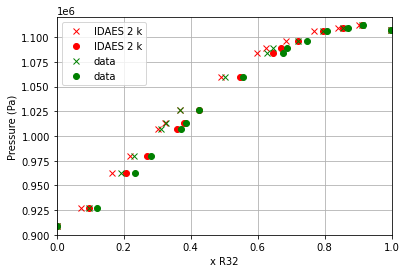

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# plt.plot(R32_x1k,P1k,"bx",label="IDAES 1 k")  
# plt.plot(R32_y1k,P1k,"bo",label="IDAES 1 k")  
plt.plot(R32_x2k,P2k,"rx",label="IDAES 2 k") 
plt.plot(R32_y2k,P2k,"ro",label="IDAES 2 k") 
# plt.plot(R32_x2k,P2k2,"yx",label="IDAES 2 k2") 
# plt.plot(R32_y2k,P2k2,"yo",label="IDAES 2 k2")  
plt.plot(data["x_R32"],data["pressure"],"gx",label="data")  
plt.plot(data["y_R32"],data["pressure"],"go",label="data") 
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R32')
plt.grid(True)
ax.set_xlim([0.0, 1])
ax.set_ylim([0.9e6, 1.120e6])
plt.legend()
plt.show()

In [22]:
print(R32_x2k)
print(R32_y2k)

[0.00000000e+00 9.36919422e-02 1.70790744e-01 2.37551400e-01
 2.42892432e-01 2.69894725e-01 4.10267632e-01 4.97375351e-01
 5.83886578e-01 6.47132872e-01 7.46036711e-01 8.85356307e-01
 9.05236768e-01 9.98997331e-01 9.94727109e-04 7.22860668e-02
 1.01479558e-01 2.28884925e-01 1.72198343e-01 3.12492632e-01
 4.28582880e-01 4.82686881e-01 6.16976501e-01 7.47194326e-01
 8.22841816e-01 8.65066026e-01 9.22372811e-01 9.98979399e-01
 9.94098604e-04 7.32088180e-02 1.65247961e-01 2.18859743e-01
 3.02892761e-01 3.22566815e-01 3.66771516e-01 4.90807772e-01
 5.99158859e-01 6.25956641e-01 6.85536462e-01 7.69420238e-01
 8.40159506e-01 9.03282190e-01 9.98967664e-01 0.00000000e+00
 1.73596524e-01 2.94791494e-01 3.24383615e-01 3.98548073e-01
 4.17995080e-01 5.47845200e-01 5.97396659e-01 6.44985863e-01
 7.01731370e-01 7.74194322e-01 0.00000000e+00 0.00000000e+00
 1.63996709e-01 2.81392304e-01 3.79783596e-01 4.65471007e-01
 5.18674802e-01 5.93004820e-01 6.39828215e-01 7.10203485e-01
 7.68584752e-01 9.989479

In [23]:
m = ConcreteModel()

m.fs = FlowsheetBlock(default={"dynamic": False})

m.fs.properties = GenericParameterBlock(default=configuration)

m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": False})

m.fs.F101.inlet.flow_mol.fix(1)
m.fs.F101.inlet.temperature.fix(323.15)
m.fs.F101.inlet.pressure.fix(399800)
# m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.5)

m.fs.properties.PR_kappa['R32', 'R125'].fix(-0.17335)
m.fs.properties.PR_kappa['R125', 'R32'].fix(-0.00116)

# Initialize the flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# Fix the state variables on the state block
# m.fs.F101.inlet.pressure.unfix()
# m.fs.F101.inlet.mole_frac_comp[0,'bmimPF6'].unfix()

R32_x2k3 = np.zeros((len(data)))
R32_y2k3 = np.zeros((len(data)))
P2k3 = np.zeros((len(data)))

# m.fs.liq = Param(mutable=True,default=0.040)
# m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "R32"] == m.fs.liq)

for i in range(len(data)):
#     m.fs.liq = data["x_R32"].iloc[i]
    m.fs.F101.inlet.temperature.fix(float(data["temperature"].iloc[i]))
    m.fs.F101.inlet.pressure.fix(float(data["pressure"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(data["x_R32"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(float(data["x_R125"].iloc[i]))
    m.fs.F101.vap_outlet.temperature.fix(float(data["temperature"].iloc[i]))
    
    DOF_final = degrees_of_freedom(m)
    print("The final DOF is {0}".format(DOF_final))
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    
    status = solver.solve(m, tee = False)

#     m.fs.F101.report()
    if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):

        R32_x2k3[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32']) 
        R32_y2k3[i] = value(m.fs.F101.vap_outlet.mole_frac_comp[0,'R32']) 
        P2k3[i] = value(m.fs.F101.vap_outlet.pressure[0])
        print('feasible')

    else:
        print('Infeasible.')

2021-03-11 23:57:54 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-11 23:57:54 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-11 23:57:54 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-11 23:57:54 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R125 was not assigned a type. Using generic Component object.
The final DOF is 0
    model.name="SimpleBlock";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
    model.name="SimpleBlock";
      - termination condition: infeasible
      - message 

    model.name="SimpleBlock";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
    model.name="SimpleBlock";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
    model.name="fs.F101";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
Infeasible.
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is 0
feasible
The final DOF is

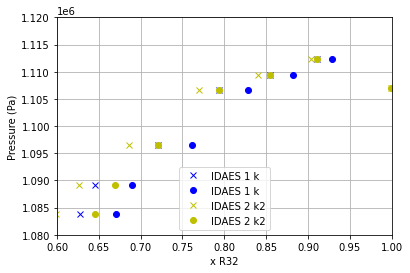

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(R32_x1k,P1k,"bx",label="IDAES 1 k")  
plt.plot(R32_y1k,P1k,"bo",label="IDAES 1 k")  
# plt.plot(R32_x2k,P2k,"rx",label="IDAES 2 k") 
# plt.plot(R32_y2k,P2k,"ro",label="IDAES 2 k") 
plt.plot(R32_x2k,P2k2,"yx",label="IDAES 2 k2") 
plt.plot(R32_y2k,P2k2,"yo",label="IDAES 2 k2") 
# plt.plot(R32_x2k3,P2k3,"mx",label="IDAES 2 k3") 
# plt.plot(R32_y2k3,P2k3,"mo",label="IDAES 2 k3")  
# plt.plot(data["x_R32"],data["pressure"],"gx",label="data")  
# plt.plot(data["y_R32"],data["pressure"],"go",label="data") 
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R32')
plt.grid(True)
ax.set_xlim([0.6, 1])
ax.set_ylim([1.08e6, 1.120e6])
plt.legend()
plt.show()